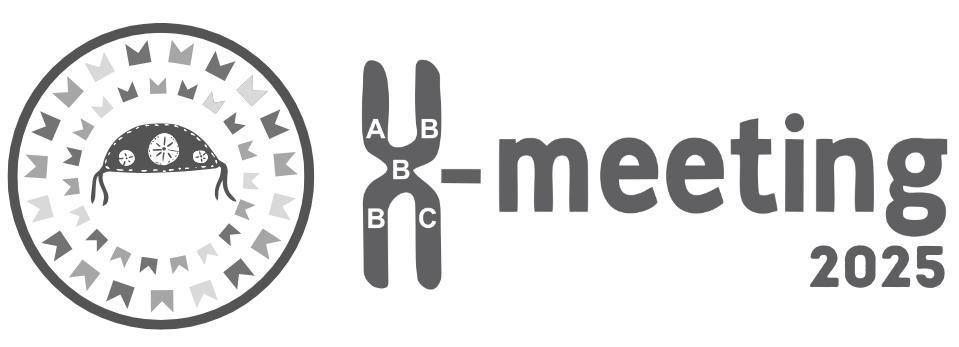

# **Day 2 - Accessing Biological Databases with `Bio.Entrez`**

**By: [Angelina de Meiras Ottoni]()**

> In this notebook, we will explore how to access biological databases from NCBI using Biopython's `Bio.Entrez` module.

**Objectives**:
- Understand the structure and role of NCBI Entrez
- Perform queries using `esearch()`
- Retrieve data using `efetch()`
- Parse GenBank files using `Bio.SeqIO`

### **What is Entrez?**

* **Entrez** is a data retrieval system developed by [**NCBI**](https://www.ncbi.nlm.nih.gov/).
* It allows access to multiple biological databases:

  * **PubMed** – literature database.
  * **GenBank** – nucleotide sequences.
  * **GEO** – gene expression data.
  * Many others.

* **You can use Entrez via:**

  * A **web browser** (manual search).
  * **Programmatic access** using `Bio.Entrez` (automated via Python scripts).

### **What is Bio.Entrez?**

* A **Biopython** module for programmatic access to NCBI Entrez databases.
* It wraps around the [**Entrez Programming Utilities (E-utilities**)](https://www.ncbi.nlm.nih.gov/home/develop/api/), which are a set of web-based tools provided by NCBI.
* Each E-utility (e.g., `esearch`, `efetch`, `esummary`) corresponds to a Python function in `Bio.Entrez`.
* The module builds the correct API URLs and ensures usage complies with NCBI guidelines.

### **What Format is the Data?**

* Most Entrez results are returned in **XML format**.
* Ways to handle XML data:

  * Use **Bio.Entrez’s parser** to convert XML into Python objects.
  * Use Python’s built-in XML libraries (e.g., `xml.etree`, `minidom`).
  * Parse XML manually using string operations (not recommended).

### **Other Possible Formats**

* Depending on the database and endpoint, **Entrez** can return:

  * **FASTA** (for sequences).
  * **GenBank format** (for annotated sequences).
  * **MedLine format** (for literature records).

### **`Bio.Entrez` Parsers and XML Handling**

* `Bio.Entrez.read()` and `parse()` are used to load and interpret XML data.
* XML data should be **read in binary mode** to allow proper encoding detection.

  ```python
  with open('file.xml', 'rb') as handle:
      record = Entrez.read(handle)
  ```

# **1. Setting Up Entrez**

In [ ]:
%pip install biopython

In [ ]:
# Import Entrez module from Biopython
from Bio import Entrez

In [ ]:
# Always tell NCBI who you are
# Copy your email address here

*Note* 🗒️ [How to get an API Key](https://support.nlm.nih.gov/kbArticle/?pn=KA-05317)

In [ ]:
Entrez.tool = 'biopython_tutorial'

### **Entrez Usage Guidelines**

>Before accessing NCBI's online resources using Biopython (e.g., via Bio.Entrez), make sure to read the [NCBI’s Entrez User Requirements](https://www.ncbi.nlm.nih.gov/books/NBK25497/#_chapter2_Usage_Guidelines_and_Requiremen_). Failing to follow these guidelines may result in your IP address being blocked by NCBI.

**1. Schedule Large Requests Wisely**

* For more than **100 requests**, run them:

  * During **weekends** or
  * **Outside peak hours in the USA** (e.g., late night or early morning UTC).
* This is **your responsibility** to manage.

---
**3. Respect Rate Limits**

* **With API key**: up to **10 requests/second**
* **Without API key**: up to **3 requests/second**
* Biopython handles these limits automatically.

**Setting your API key:**

```python
from Bio import Entrez
Entrez.api_key = "YourAPIKey"
```

---

**4. Always Set an Email Address**

* NCBI **requires** an email address for contact in case of issues.
* Use the `email` parameter globally or per request.

**Global setting:**

```python
from Bio import Entrez
Entrez.email = "your.email@example.com"
```

> ⚠️ Do not use fake emails. If abuse is detected, NCBI will try to contact you before blocking your access.

---

**5. Identify Your Tool**

* If using Biopython as part of a larger tool or script, specify the `tool` name.

**Global setting:**

```python
from Bio import Entrez
Entrez.tool = "MyScriptOrApp"
```

* Default value is `"Biopython"`


# **2. Searching NCBI Databases with `esearch()`**

## 🔍 **Using `Entrez.esearch()`**

- `Entrez.esearch()` is a function from the `Bio.Entrez` module in Biopython.  
- It allows you to **search records** in NCBI databases programmatically.

>This function is equivalent to searching on the NCBI website, but within Python scripts or notebooks.

### ⚙️ **Key Parameters of `Entrez.esearch()`**

| Parameter     | Description                                                                 |
|---------------|-----------------------------------------------------------------------------|
| `db`*          | Database name (e.g., `'pubmed'`, `'nucleotide'`, `'gene'`)                  |
| `term`*        | Search term (e.g., `'BRCA1[Gene]'`, `'Homo sapiens[Organism]'`)             |
| `retmax`      | Maximum number of results to return *(default: 20)*                           |
| `sort`        | Sorting method (e.g., `'relevance'`, `'date'`)                              |


### **Usage Example: `Entrez.esearch()`**

In [ ]:
# Search the NCBI Nucleotide database for records related to the organism Lachnocladium


# Parse the search results (XML format) into a Python dictionary


# Close the handle to free resources


# print(record['IdList'])

**`idtype`**

- Specifies the type of identifier to return for sequence databases (nuccore, popset, protein).
- *By default, ESearch returns GI numbers in its output.*
- If idtype is set to ‘acc’, ESearch will return **accession.version** identifiers rather than GI numbers.

#### 📌 **Variables**

- `handle`: a response object returned by `Entrez.esearch()`. It contains the raw XML data from NCBI.
- `record`: a parsed Python dictionary created by `Entrez.read(handle)`, which includes:
  - `'Count'`: the total number of records matching the search term.
  - `'RetMax'`: the maximum number of records returned in this request (default is 20).
  - `'IdList'`: a list of unique IDs (UIDs) for the matched records.

📝 **Note:**  
- The variable names `handle` and `record` are **just conventional**.  
- You can use any valid variable name (e.g., `response`, `data`, etc.).  
- However, using descriptive names helps keep your code clear and readable.

In [ ]:
type()

In [ ]:
# Code here

In [ ]:
# Code here

### **Exploring the Results**

In [ ]:
# Display total number of matched entries

# Display number of results returned (default is ??)

### ⚠️ **Why was only 20 returned, but 24 found?**

By default, `Entrez.esearch()` returns a maximum of 20 results unless you specify otherwise using the `retmax` parameter.

- `record['Count']`: tells you how many results matched your search (in our case, 24).
- `record['RetMax']`: tells you how many results were actually returned (default is 20).

To retrieve more results, increase `retmax` in the function call.

### **Getting All Results**

In [ ]:


# print('Now returned:', len(record['IdList']), 'IDs')

In [ ]:
# Code here

In [ ]:
# Code here

### **How to build the term parameter in `Entrez.esearch()`**

#### 🧠 **What is `term`?**
- The `term` parameter defines the *search query*. It tells NCBI what you want to find, in which field, and how to combine multiple conditions.


```python
Example:
    term = '"Homo sapiens"[Organism] AND BRCA1[Gene]'
```

#### 📚 **Useful ways to learn how to write `term`**

**1. Use the NCBI Web Interface to Build Queries**
- **Tip**: Anything you can search on the NCBI site can be replicated via `term`.

**2. Documentation:**
- [Entrez Help – Search Field Descriptions and Tags](https://www.ncbi.nlm.nih.gov/books/NBK49540/)
- [E-utilities documentation](https://www.ncbi.nlm.nih.gov/books/NBK25499/)
- [PubMed Search Tags](https://pubmed.ncbi.nlm.nih.gov/help/#search-tags)

### 🔤 **Common field tags**

- `[Organism]`     → Search by organism name
- `[Gene]`         → Search by gene symbol
- `[Title]`        → Search terms in the title
- `[Author]`       → Useful in PubMed
- `[Accession]`    → Search by accession number
- `[All Fields]`   → Generic, less precise

**Example:**

```python
    '"Lachnocladium"[Organism]'
```

### ⚙️ **Boolean operators**

- `AND` → both conditions must be true
- `OR` → either condition is true
- `NOT` → exclude results

**Examples:**

```python
'"Lachnocladium"[Organism] AND ITS[Title]'
'BRCA1[Gene] OR TP53[Gene]'
'"Homo sapiens"[Organism] NOT mitochondrion[Filter]'
```

### **🧪 Try it out!**
- Modify the query to search for sequences related to the BRCA1 gene in *Mus musculus*.

# **3. Fetching Sequence Records with `Entrez.efetch()`**

## 🔍 **Using `Entrez.efetch()`**

- The `Entrez.efetch()` function from the `Bio.Entrez` module (Biopython) is used to **fetch full records** from NCBI databases such as **Nucleotide**, **Protein**, **PubMed**, and more.

- It is a key function when you already know the **ID(s)** of the entries you're interested in and want to retrieve **detailed content**, like full sequences or article metadata.

>**Remember:** Always set your email using `Entrez.email` before making requests. NCBI requires it for tracking and contact in case of misuse.

### ⚙️ **Key Parameters of `Entrez.efetch()`**

| Parameter    | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| `db`         | Name of the NCBI database (`'nucleotide'`, `'protein'`, `'pubmed'`, etc.)   |
| `id`         | A single ID or list of IDs of the records to fetch                          |
| `rettype`    | Return type (e.g., `'gb'` for GenBank, `'fasta'`, `'medline'`)              |
| `retmode`    | Return mode (`'text'`, `'xml'`, `'asn.1'`)                                  |
| `retstart`   | (Optional) Starting position (for partial retrieval of large sets)          |
| `retmax`     | (Optional) Maximum number of records to retrieve                            |


### **Usage Example: `Entrez.efetch()`**

In [ ]:


# print(gb_data[:1000])  # Print only the first 1000 characters

# **4. Parsing GenBank Files with `Bio.SeqIO`**

>`Bio.SeqIO` is a Biopython module for **input/output operations** with biological sequences.

- It supports a wide range of **file formats**, such as:
    - `fasta`
    - `genbank`
    - `embl`
    - `phylip`
    - and more

- It provides a simple interface to **read, write, parse, and iterate** over sequence records as `SeqRecord` objects.

#### **Overview of `Bio.SeqIO.parse()`**

The `SeqIO.parse()` function is used to read multiple records from a file. It takes two main arguments:

- `handle`: A file handle (opened in text mode) or a string path to the file.
- `format`: The format of the file (e.g., `'genbank'`, `'fasta'`, `'embl'`).

It returns an iterator over `SeqRecord` objects, which represent individual biological sequences with associated annotations.

In [ ]:
# Import the SeqIO module for reading sequence files
from Bio import SeqIO
# Import StringIO to treat a string as a file-like object
from io import StringIO

In [ ]:
# Convert the GenBank data string into a file-like object


In [ ]:
# Parse the GenBank-formatted data and iterate over sequence records


# **5. Exploring Other Databases**

In [ ]:
# Code here

# **6. Challenge**

Combine everything you've learned so far:
- Search for a mitochondrial gene in *Pan troglodytes*
- Fetch the GenBank record
- Extract the gene names and sequence lengths

# **7. Wrap-up**

**Today, we:**
- Learned how to use `esearch()` and `efetch()` from Bio.Entrez
- Fetched GenBank records and parsed them with `Bio.SeqIO`
- Practiced filtering and extracting biological information

**Next step**: We’ll dive into sequence similarity searches using BLAST!

[Accessing NCBI’s Entrez databases](https://biopython.org/docs/dev/Tutorial/chapter_entrez.html)